In [2]:
# 이미지 그레이스케일로 읽기
import cv2
img = cv2.imread('a.jpg',0) # 1: 칼라, 0: 흑백

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# 이미지 밝기 조절
img2 = img + 100 # 이미지 밝게 처리
img3 = img - 100 # 이미지 어둡게 처리

cv2.imshow('img2',img2)
cv2.imshow('img3',img3)
cv2.waitKey(0)
cv2.destoryAllWindows()

# 이상하게 변경되는 이유는 포화연산 때문에
# uint8 : 0 - 255까지 표현가능
# 만약 원래 값이 200이였다면 +100 연산으로 300으로 변경. uint8 범위 초과
# overflow되어서 45가됨.

AttributeError: module 'cv2.cv2' has no attribute 'destoryAllWindows'

In [4]:
import numpy as np

def saturate_bright(p, num):
    pic = p.copy() # 원본 보호를 위한 깊은 복사
    pic = pic.astype('int32') # 타입 변환
    pic = np.clip(pic+num, 0, 255) # 타입 변환으로 인해 300으로 정상 변환
    pic = pic.astype('uint8') # 이미지 표현은 항상 uint8이므로 재 변환
    return pic

def saturate_dark(p, num):
    pic = p.copy()
    pic = pic.astype('int32')
    pic = np.clip(pic-num, 0, 255)
    pic = pic.astype('uint8')
    return pic

In [ ]:
img2 = saturate_bright(img, 100)  #이미지 밝게 처리
img3 = saturate_dark(img, 100)  #이미지 어둡게 처리
cv2.imshow('img', img)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(img2)

이미지 밝기를 트랙바로 조절하기

In [16]:
import cv2
import numpy as np

img = cv2.imread('a.jpg',0) # 1: 칼라, 0: 흑백
crt_num = None

cv2.namedWindow('image')
crt_num = 50
switch = '0~100'
cv2.createTrackbar(switch, 'image', 50, 100, nothing)

def nothing(x):
    global crt_num, img
    crt_num = 50
    img = cv2.imread('a.jpg',0)

    if x >= 50:
        img = saturate_bright(img, x - crt_num)
    else:
        img = saturate_dark(img, crt_num - x)


while(1):
    cv2.imshow('image', img)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()

In [ ]:
def br(pos):
    pic = saturate_bright(img, pos)
    cv2.imshow('img', pic)

def da(pos):
    pic = saturate_dark(img, pos)
    cv2.imshow('img', pic)
    
img = cv2.imread('d.jpg', 1)
cv2.imshow('img', img)
cv2.createTrackbar('bright', 'img', 0, 100, br)
cv2.createTrackbar('dark', 'img', 0, 100, da)
cv2.waitKey(0)
cv2.destroyAllWindows()


명암비

In [17]:
def saturate_contrast1(p, num):
    pic = p.copy()
    pic = pic.astype('int64')
    pic = np.clip(pic*num, 0, 255)
    pic = pic.astype('uint8')
    return pic

In [18]:
#명암비를 1보다 작게 주면 밝기 차가 줄어들고 전반적으로 어두어짐
img4 = saturate_contrast1(img,0.5)

#명암비를 1보다 크게 주면 밝기 차가 커지고 흰색 영역이 넓어짐
img5 = saturate_contrast1(img, 2)  

cv2.imshow('img', img)
cv2.imshow('img4', img4)
cv2.imshow('img5', img5)
cv2.waitKey(0)
cv2.destroyAllWindows()

*명암비 효율적 조절 - 픽셀 중간값인 128을 기준으로 이 보다 큰 값은 더 밝게 만들고 128보다 작은 값은 더 어둡게 만듦으로써 대비를 크게 함

dst(x, y) = src(x, y) + (src(x, y)-128)*alpha

In [19]:
def saturate_contrast2(p, num):
    pic = p.copy()
    pic = pic.astype('int32')
    pic = np.clip(pic+(pic-128)*num, 0, 255)
    pic = pic.astype('uint8')
    return pic

In [22]:
img = cv2.imread('b.jpg',1)
img4 = saturate_contrast2(img,-0.5)
img5 = saturate_contrast2(img, 2)  

cv2.imshow('img', img)
cv2.imshow('img4', img4)
cv2.imshow('img5', img5)
cv2.waitKey(0)
cv2.destroyAllWindows()

<히스토그램 분석>  
영상 픽셀 밝기 분포를 분석하여 밝기, 명암비 조절

- cv2.calcHist(img, channel, mask, histSize, range)  
img: 이미지 배열  
channel: 분석할 칼라  
mask: 분석할 영역. None이면 이미지 전체  
histSize: 히스토그램 크기. x축 값 개수  
range: x축 값 범위  

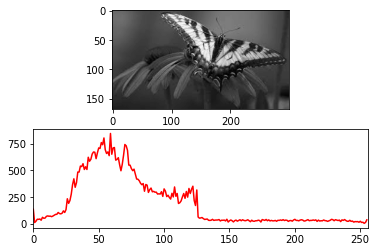

In [23]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('b.jpg', 0)
# 원본 이미지를 리스트 형태로 지정해야함.
hist = cv2.calcHist([img],[0],None,[256],[0,256]) 

# subplot : 여러 개의 그래프 나타낼 때 사용
plt.subplot(2,1,1),plt.imshow(img,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

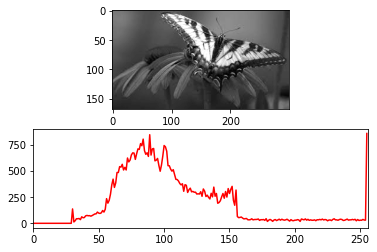

In [24]:
img2 = saturate_bright(img, 30) # 이미지 밝게 처리

hist = cv2.calcHist([img2],[0],None,[256],[0,256])

plt.subplot(2,1,1),plt.imshow(img2,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

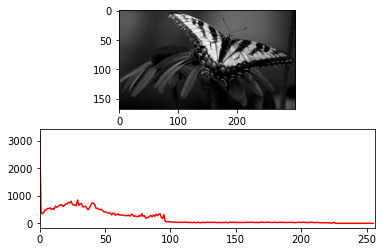

In [26]:
img3 = saturate_dark(img, 30)

hist = cv2.calcHist([img3],[0],None,[256],[0,256])

plt.subplot(2,1,1),plt.imshow(img3,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

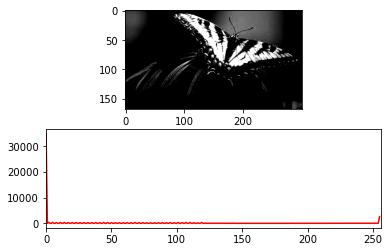

In [27]:
img4 = saturate_contrast2(img, 2)

hist = cv2.calcHist([img4],[0],None,[256],[0,256])

plt.subplot(2,1,1),plt.imshow(img4,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

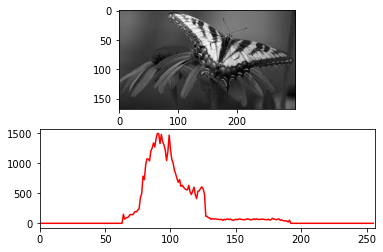

In [29]:
img5 = saturate_contrast2(img, -0.5)

hist = cv2.calcHist([img5],[0],None,[256],[0,256])

plt.subplot(2,1,1),plt.imshow(img5,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

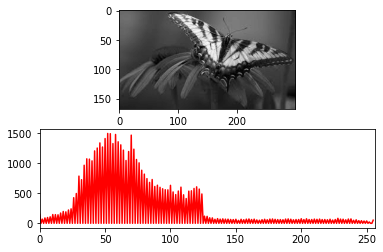

In [30]:
f_max = img5.max()
f_min = img5.min()
nframe = img5.astype('int64')

img6 = np.clip((nframe - f_min)*255/(f_max - f_min), 0, 255).astype('uint8')

hist = cv2.calcHist([img6],[0],None,[256],[0,256])

plt.subplot(2,1,1),plt.imshow(img6,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

In [33]:
#이 문제를 먼저 풀고 가시오
#배열 인덱싱
a=np.array([1,2,3,4,5])
b=np.array([[0,3],[1,4]])

# b배열을 a배열의 값을 추출하는 인덱스로 사용
a[b] 

array([[1, 4],
       [2, 5]])

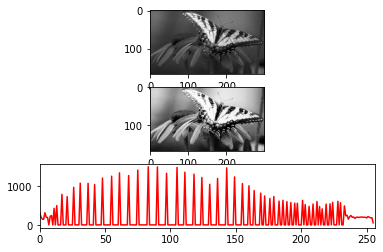

In [40]:
hist, bins = np.histogram(img5.flatten(), 256,[0,256]) # flatten : 다차원배열을 일차원 배열로

cdf = hist.cumsum()  #누적합. 각 빈의 누적합 계산 (b)-책 255pg
cdf_m = np.ma.masked_equal(cdf,0) #속도개선을 위해 0인 부분 제외

#히스토그램 평활화 (c)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

# Mask처리를 했던 부분을 다시 0으로 변환 (c)
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img7 = cdf[img5]#img5의 값이 cdf배열의 인덱스로 사용됨
                #cdf는 히스토그램 평활화된 값이 저장되어 있으므로
                #img5[12][10]칸의 픽셀값이 125이면 cdf[125]의 값을 추출
                #이 값은 픽셀값 125가 평활화된 값이다 (d)
            
hist = cv2.calcHist([img7],[0],None,[256],[0,256])
plt.subplot(3,1,1),plt.imshow(img5,'gray')
plt.subplot(3,1,2),plt.imshow(img7,'gray')
plt.subplot(3,1,3),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

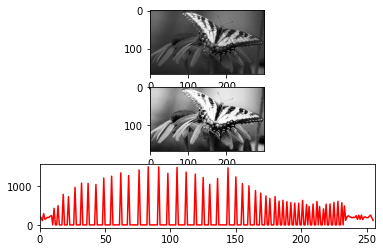

In [38]:
img8 = cv2.equalizeHist(img5)
hist = cv2.calcHist([img8],[0],None,[256],[0,256])
plt.subplot(3,1,1),plt.imshow(img5,'gray')
plt.subplot(3,1,2),plt.imshow(img8,'gray')
plt.subplot(3,1,3),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

이미지에 and, or, not, xor 연산 수행
이미지 연산은 각 픽셀의 b, g, r bit별 수행

In [16]:
import cv2
import numpy as np

img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.jpg')

img3 = cv2.bitwise_and(img1, img2)
img4 = cv2.bitwise_or(img1, img2)
img5 = cv2.bitwise_not(img2)
img6 = cv2.bitwise_xor(img1, img2)

imgh1 = cv2.hconcat([img1, img2, img3])
imgh2 = cv2.hconcat([img4, img5, img6])

res = cv2.vconcat([imgh1, imgh2])

cv2.imshow('img', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

<이미지 합성>  
두 이미지의 픽셀값을 더하여 구함

In [17]:
img1 = cv2.imread('a.jpg', 1)
img1 = cv2.resize(img1, dsize=(640, 410), interpolation=cv2.INTER_AREA)
img2 = cv2.imread('b.jpg', 1)
img2 = cv2.resize(img2, dsize=(640, 410), interpolation=cv2.INTER_AREA)

img3 = img1 + img2
cv2.imshow('img', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

하지만 그냥 더하면 포화문제 발생하므로 포화연산 추가

In [18]:
def saturate_add(p1, p2):
    pic1 = p1.copy()
    pic2 = p2.copy()
    
    pic1 = pic1.astype('int64')
    pic2 = pic2.astype('int64')
    
    pic = np.clip(pic1+pic2, 0, 255)

    pic = pic.astype('uint8')
    return pic

In [19]:
img3 = saturate_add(img1, img2)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

<이미지 합성 함수>  
cv2.add(img1, img2)

In [20]:
img5 = cv2.add(img1, img2)
cv2.imshow('img3', img3)
cv2.imshow('img5', img5)
cv2.waitKey(0)
cv2.destroyAllWindows()

<가중치 합성 함수>  
이미지 합성시 원본 이미지에 가중치를 주어 덧셈. 가중치의 합은 1이어야 하고 가중치가 큰 쪽 이미지가 강하게 나옴  

dst(x, y) = alpha src1(x, y) + beta src2(x, y)

In [21]:
def saturate_addWeight(p1, a1, p2, a2):
    pic1 = p1.copy()
    pic2 = p2.copy()
    
    pic1 = pic1.astype('int64')
    pic2 = pic2.astype('int64')
    
    pic = np.clip(a1*pic1 + a2*pic2, 0, 255)
    
    pic = pic.astype('uint8')
    return pic

In [28]:
img3 = saturate_addWeight(img1, 0.4, img2, 0.6)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
img5 = cv2.addWeighted(img1, 0.4, img2, 0.6, 0)
cv2.imshow('img3', img3)
cv2.imshow('img5', img5)
cv2.waitKey(0)
cv2.destroyAllWindows()

<마스크 연산>  
추출하고 싶은 객체를 제외한 나머지 배경을 0으로 처리하면 배경은 검정색, 객체는 그대로인 이미지가 된다. 이를 합성하려는 이미지와 더하면 배경은 0이므로 합성하는 이미지의 내용 그대로, 객체는 위로 붙게된다.

In [6]:
import cv2

daum_logo = cv2.imread('daum.png',1)
img1 = cv2.imread('c.jpg',1)
h, w, c = daum_logo.shape

# c.jpg의 크기가 작으므로 크기 변경
img1 = cv2.resize(img1, dsize=(640, 410), interpolation=cv2.INTER_AREA) 
img1[100:100+h, 100:100+w] = daum_logo

cv2.imshow('img1',img1)
# cv2.imshow('daum',daum_logo)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [65]:
b1 = np.full((200,300,3), (0,255,255), dtype = np.uint8)
b2 = np.full((200,300,3), (0,0,0), dtype = np.uint8)

b3 = b1 + b2

# 색 합성은 값으로 생각해야 하기 때문에 검정(0)을 더한다고 생각하면 색은 그대로임.
cv2.imshow('b1', b1)
cv2.imshow('b2', b2)
cv2.imshow('b3', b3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
# 해당 방식은 logo 글씨가 이상하게 합성됨.

import cv2

daum_logo = cv2.imread('daum.png',1)
h, w, c = daum_logo.shape

img1 = cv2.imread('c.jpg',1)
# c.jpg의 크기가 작으므로 크기 변경
img1 = cv2.resize(img1, dsize=(640, 410), interpolation=cv2.INTER_AREA) 

# logo의 픽셀 값들 중 255인 것들을 0으로
daum_logo[daum_logo[:]==255] = 0

roi = img1[100:100+h, 100:100+w]
cv2.imshow('roi',roi)
new_roi = cv2.add(roi, daum_logo)

img1[100:100+h, 100:100+w] = new_roi
cv2.imshow('img1',img1)
# cv2.imshow('daum',daum_logo)
cv2.waitKey(0)
cv2.destroyAllWindows()

로고만 뚜렷하게 나오도록 자연스럽게 합성하기

In [67]:
import cv2

daum_logo = cv2.imread('daum.png',1)
h, w, c = daum_logo.shape

img1 = cv2.imread('c.jpg',1)
# c.jpg의 크기가 작으므로 크기 변경
img1 = cv2.resize(img1, dsize=(640, 410), interpolation=cv2.INTER_AREA) 

roi = img1[100:100+h, 100:100+w] # 배경이미지의 변경할(다음 로고넣을) 영역

mask = cv2.cvtColor(daum_logo, cv2.COLOR_BGR2GRAY) # 로고를 흑백처리

cv2.imshow('mask',mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [68]:
# 이미지 이진화 => 배경은 검정. 글자는 흰색
mask[mask[:]==255] = 0
mask[mask>0] = 255 # 0보다 큰 값은 글자니깐 해당 값을 흰색으로

cv2.imshow('mask',mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [69]:
# 마스트 반전 => 배경은 흰색, 글자는 검성
mask_inv = cv2.bitwise_not(mask)

cv2.imshow('mask_inv',mask_inv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [70]:
# 마스크와 로고 칼라이미지 and하면 글자만 추출됨
daum = cv2.bitwise_and(daum_logo, daum_logo, mask = mask)
cv2.imshow('daum',daum)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [71]:
# roi와 mask_inv와 and하면 roi에 글자모양만 검정색을 됨
back = cv2.bitwise_and(roi, roi, mask=mask_inv)
cv2.imshow('back',back)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [72]:
# back과 로고를 합치고 이것을 원본 이미지에 합성
dst = cv2.add(daum, back)

img1[100:100+h, 100:100+w] = dst
cv2.imshow('img1',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
daum_logo = cv2.imread('daum.png', 1)
img1 = cv2.imread('b.jpg', 1)
h, w, c = daum_logo.shape
roi = img1[150:150+h, 150:150+w]#배경이미지의 변경할(다음 로고 넣을) 영역

mask = cv2.cvtColor(daum_logo, cv2.COLOR_BGR2GRAY)#로고를 흑백처리
#이미지 이진화 => 배경은 검정. 글자는 흰색
mask[mask[:]==255]=0
mask[mask[:]>0]=255

mask_inv = cv2.bitwise_not(mask) #mask반전.  => 배경은 흰색. 글자는 검정

daum = cv2.bitwise_and(daum_logo, daum_logo, mask=mask)#마스크와 로고 칼라이미지 and하면 글자만 추출됨
back = cv2.bitwise_and(roi, roi, mask=mask_inv)#roi와 mask_inv와 and하면 roi에 글자모양만 검정색으로 됨

dst = cv2.add(daum, back)#로고 글자와 글자모양이 뚤린 배경을 합침

img1[150:150+h, 150:150+w] = dst  #roi를 제자리에 넣음

cv2.imshow('mask', dst)
cv2.imshow('img1', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


<이미지 차>  
두 이미지 빼기 연산으로 차를 구할 수 있음  

dst(x, y) = src1(x, y) - src2(x, y)

In [73]:
import cv2
def saturate_sub1(p1, p2):
    img1 = p1.copy()
    img2 = p2.copy()
    img1 = img1.astype('int32')
    img2 = img2.astype('int32')
    img3 = np.clip(img1 - img2, 0, 255)
    img3 = img3.astype('uint8')
    return img3

In [85]:
arr1 = np.zeros((410, 320), dtype=np.uint8)
arr2 = np.full((410, 320), 255, dtype=np.uint8)
img1 = np.hstack((arr1, arr2))

img2 = cv2.imread('b.jpg', 0)
img2 = cv2.resize(img2, dsize=(640, 410), interpolation=cv2.INTER_AREA) 

img3 = saturate_sub1(img1, img2) # 흰색에서 뺐기 때문에 색 반전
img4 = saturate_sub1(img2, img1)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.imshow('img4', img4)
cv2.waitKey(0)
cv2.destroyAllWindows()

이미지 차 함수  
cv2.absdiff(img2, img1)

In [86]:
img3 = cv2.subtract(img1, img2)
img4 = cv2.subtract(img2, img1)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.imshow('img4', img4)
cv2.waitKey(0)
cv2.destroyAllWindows()

위의 차 함수로 처리하면 블랙에서 빼면 음수가 되어 모두 블랙이 되고 흰색에서 빼면 보색이 되므로 절대값으로 처리하는 것이 더 자연스럽다

In [81]:
def saturate_sub(p1, p2):
    pic1 = p1.copy()
    pic2 = p2.copy()
    
    pic1 = pic1.astype('int64')
    pic2 = pic2.astype('int64')
    
    pic = np.clip(np.abs(pic1 - pic2), 0, 255)
 
    pic = pic.astype('uint8')
    return pic

In [82]:
img3 = saturate_sub(img2, img1)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

이미지 차 함수  
cv2.absdiff(img2, img1)

In [87]:
img3 = cv2.absdiff(img2, img1)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

실습: 차함수를 활용하면 영상에서 움직이는 객체만 추출하는 것이 가능하다
- 이전 영상과 현재 영상의 차

In [94]:
import cv2

cap = cv2.VideoCapture(0) # 카메라 오픈
cap.set(3, 300)
cap.set(4, 200)

prev_frame = None
ret, prev_frame = cap.read() # 첫 영상 읽음
while True:
    ret, frame = cap.read()
    if ret:  # 정상 읽기일 때만
        f = cv2.absdiff(prev_frame, frame)
        cv2.imshow('video', f) # 영상을 윈도우에 출력
        prev_frame = frame
        
    if cv2.waitKey(1) == 27: # 입력한 키가 esc이면
        break
    
cap.release()
cv2.destroyAllWindows()